<a href="https://colab.research.google.com/github/bharathdev329/ICT-DSA/blob/main/Loan_Prediction_Assiss_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/case study.csv')

In [ ]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
train.drop('Loan_ID', axis=1,inplace = True)

In [ ]:
train['Credit_History'].fillna(0,inplace=True)
train['Self_Employed'].fillna('No',inplace=True)
train['Dependents'].fillna('other',inplace=True)
train['LoanAmount'].fillna(0,inplace=True)
train['Loan_Amount_Term'].fillna(0,inplace=True)
train['Gender'].fillna('other',inplace=True)
train['Married'].fillna('No',inplace=True)

In [ ]:
train.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


<Axes: xlabel='Dependents', ylabel='LoanAmount'>

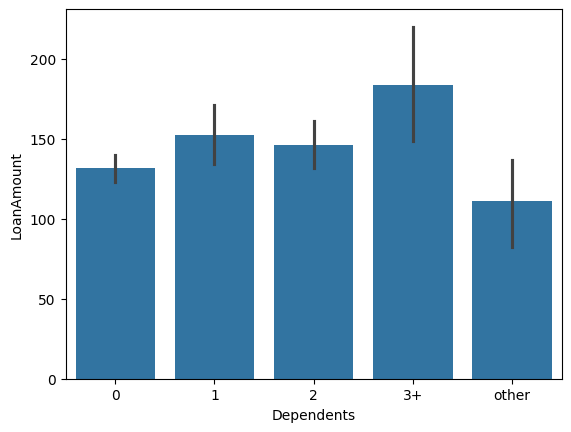

In [ ]:
sns.barplot(x='Dependents',y='LoanAmount',data=train)

<Axes: xlabel='Loan_Status', ylabel='count'>

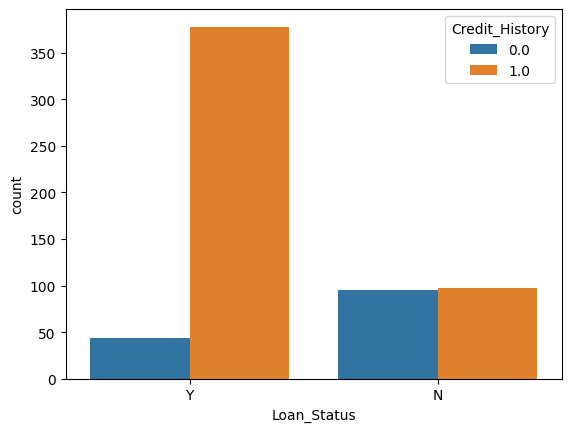

In [ ]:
sns.countplot(data = train, x='Loan_Status',hue='Credit_History')

In [ ]:
train['Gender'].unique()

array(['Male', 'Female', 'other'], dtype=object)

In [ ]:
train['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', 'other'], dtype=object)

In [ ]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['Gender']= label_encoder.fit_transform(train['Gender'])
train['Gender'].unique()

array([1, 0, 2])

In [ ]:
train['Married']= label_encoder.fit_transform(train['Married'])
train['Married'].unique()

array([0, 1])

In [ ]:
train['Dependents']= label_encoder.fit_transform(train['Dependents'])
train['Dependents'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
train['Education']= label_encoder.fit_transform(train['Education'])
train['Education'].unique()

array([0, 1])

In [ ]:
train['Self_Employed']= label_encoder.fit_transform(train['Self_Employed'])
train['Self_Employed'].unique()

array([0, 1])

In [ ]:
train['Property_Area']= label_encoder.fit_transform(train['Property_Area'])
train['Property_Area'].unique()

array([2, 0, 1])

In [ ]:
train['Loan_Amount_Term']= label_encoder.fit_transform(train['Loan_Amount_Term'])
train['Loan_Amount_Term'].unique()

array([ 9,  5,  7,  0,  6,  3,  8, 10,  2,  4,  1])

In [ ]:
train['Loan_Status']= label_encoder.fit_transform(train['Loan_Status'])
train['Loan_Status'].unique()

array([1, 0])

In [ ]:
outlier_col = []
for column in train.select_dtypes(include=['float64']):
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)][column]
    print(f"Outliers in {column}: {len(outliers)}")
    count =  outliers.shape[0]
    if count>0:
      outlier_col.append(column)
print(outlier_col)

Outliers in CoapplicantIncome: 18
Outliers in LoanAmount: 41
Outliers in Credit_History: 139
['CoapplicantIncome', 'LoanAmount', 'Credit_History']


In [ ]:
import scipy.stats as stats
z = np.abs(stats.zscore(train))
data_clean = train[(z < 3).all(axis=1)]
data_clean.shape

(572, 12)

,count
Loan_Status,
1,398
0,174


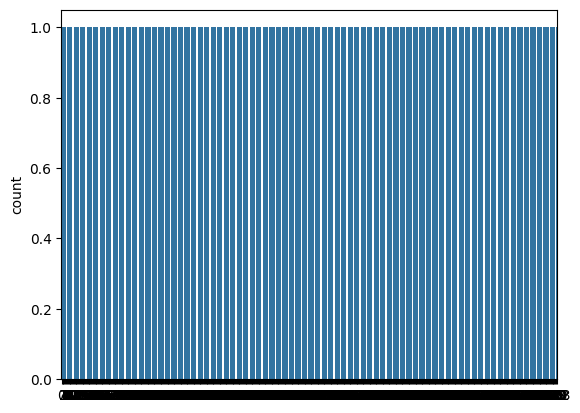

In [ ]:
sns.countplot(data_clean['Loan_Status'])
data_clean['Loan_Status'].value_counts()

In [ ]:
from sklearn.utils import resample
import numpy as np
import pandas as pd
train_majority = data_clean[data_clean['Loan_Status']==1]
train_minority = data_clean[data_clean['Loan_Status']==0]
train_minority_upsampled = resample(train_minority,
                                    replace=True,
                                    n_samples=len(train_majority),
                                    random_state=0)

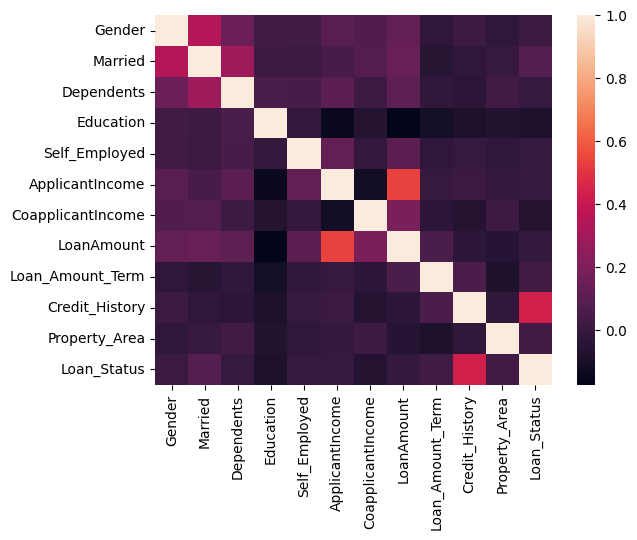

In [ ]:
sns.heatmap(train.corr(),fmt='.2g')
plt.show()

In [ ]:
x = train_upsampled.drop('Loan_Status',axis=1)
y = train_upsampled['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(random_state=0)
d_tree.fit(x_train,y_train)


DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = d_tree.predict(x_test)
print('Accuracy Score', round(accuracy_score(y_test, y_pred)*100,2), '%')

Accuracy Score 85.62 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score , precision_score, recall_score
print('f-1 score',(f1_score(y_test, y_pred)))
print('precision score :', (precision_score(y_test, y_pred)))
print('recall score :', (recall_score(y_test, y_pred)))

f-1 score 0.8516129032258065
precision score : 0.8918918918918919
recall score : 0.8148148148148148


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rf.predict(x_test)
print('Accuracy Score', round(accuracy_score(y_test, y_pred)*100,2), '%')

Accuracy Score 90.0 %


In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
test_model = rf.predict(train.drop(columns=['Loan_Status'])) # Drop the column 'Loan_Status' from the 'train' dataframe.

In [ ]:
test_model

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
test.shape

(367, 12)

In [ ]:
test.isna().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
test_drop = test.drop('Loan_ID', axis=1)

In [ ]:
test['Gender'].fillna('other',inplace=True)
test['Married'].fillna('No',inplace=True)
test['Dependents'].fillna('other',inplace=True)
test['Self_Employed'].fillna('No',inplace=True)
test['LoanAmount'].fillna(0,inplace=True)
test['Loan_Amount_Term'].fillna(0,inplace=True)
test['Credit_History'].fillna(0,inplace=True)

In [ ]:
test.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
test = pd.get_dummies(test, columns=['Dependents'], drop_first= True)
test = pd.get_dummies(test, columns=['Property_Area'], drop_first= True)

In [ ]:
test.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Dependents_other,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,Male,Yes,Graduate,No,5720,0,110.0,360.0,1.0,False,False,False,False,False,True
1,LP001022,Male,Yes,Graduate,No,3076,1500,126.0,360.0,1.0,True,False,False,False,False,True
2,LP001031,Male,Yes,Graduate,No,5000,1800,208.0,360.0,1.0,False,True,False,False,False,True
3,LP001035,Male,Yes,Graduate,No,2340,2546,100.0,360.0,0.0,False,True,False,False,False,True
4,LP001051,Male,No,Not Graduate,No,3276,0,78.0,360.0,1.0,False,False,False,False,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = ss.fit_transform(test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
test.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Dependents_other,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,Male,Yes,Graduate,No,0.186461,-0.673335,-0.386126,0.296473,1.0,False,False,False,False,False,True
1,LP001022,Male,Yes,Graduate,No,-0.352692,-0.029848,-0.131656,0.296473,1.0,True,False,False,False,False,True
2,LP001031,Male,Yes,Graduate,No,0.039641,0.098849,1.172507,0.296473,1.0,False,True,False,False,False,True
3,LP001035,Male,Yes,Graduate,No,-0.502774,0.418877,-0.545171,0.296473,0.0,False,True,False,False,False,True
4,LP001051,Male,No,Not Graduate,No,-0.311909,-0.673335,-0.895068,0.296473,1.0,False,False,False,False,False,True


In [ ]:
test_model = ['Y' if model ==1 else 'N' for model in test_model]

In [ ]:
test['Loan_Status'] = test_model[:len(test)]

In [ ]:
ID = test['Loan_ID']

In [ ]:
test_result = pd.DataFrame({'Loan_ID': ID, 'Loan_Status':test_model[:len(test)]})

In [ ]:
test_result.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
test_result.to_csv('submission.csv')